# Análisis de Términos de Búsqueda

**Pregunta de Investigación MQ6:** ¿Cuáles son los términos de búsqueda más utilizados para definir el alcance de la revisión?

Este notebook analiza los términos de búsqueda utilizados en los estudios incluidos en la revisión sistemática.

In [1]:
# Configuración del entorno
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
import re
from wordcloud import WordCloud
import warnings
warnings.filterwarnings('ignore')

# Configurar estilo de gráficos
plt.style.use('default')
sns.set_palette("husl")

In [6]:
# Cargar el dataset desde GitHub
url = "https://raw.githubusercontent.com/mlproyecto/doctorado/main/MappingReview.csv"
df = pd.read_csv(url, sep=';', encoding='latin-1')

# Limpiar los nombres de las columnas para eliminar espacios en blanco
df.columns = df.columns.str.strip()

print(f"Dataset cargado: {df.shape[0]} filas y {df.shape[1]} columnas")

print(f"Columnas disponibles: {df.columns.tolist()}")

Dataset cargado: 89 filas y 8 columnas
Columnas disponibles: ['Title', 'Author(s)', 'Year', 'Publication Title', 'Type of Publication', 'Source', 'DOI', 'Abstract']


In [8]:
# Extraer términos de búsqueda de títulos y abstracts
def extract_search_terms(text):
    if pd.isna(text):
        return []
    
    # Convertir a minúsculas y dividir en palabras
    words = re.findall(r'\b\w+\b', str(text).lower())
    
    # Filtrar palabras comunes y términos técnicos
    stop_words = {'the', 'and', 'or', 'in', 'on', 'at', 'to', 'for', 'of', 'with', 'by', 'a', 'an', 'is', 'are', 'was', 'were', 'be', 'been', 'have', 'has', 'had', 'do', 'does', 'did', 'will', 'would', 'could', 'should', 'may', 'might', 'can', 'this', 'that', 'these', 'those', 'i', 'you', 'he', 'she', 'it', 'we', 'they', 'me', 'him', 'her', 'us', 'them'}
    
    # Términos específicos de IA/ML y educación matemática
    ai_ml_terms = {'artificial', 'intelligence', 'ai', 'machine', 'learning', 'ml', 'deep', 'neural', 'network', 'algorithm', 'model', 'prediction', 'classification', 'regression', 'clustering', 'supervised', 'unsupervised', 'reinforcement', 'learning', 'data', 'mining', 'big', 'data', 'analytics', 'predictive', 'modeling'}
    
    # Términos de educación matemática
    math_terms = {'mathematics', 'math', 'mathematical', 'education', 'teaching', 'learning', 'student', 'teacher', 'classroom', 'curriculum', 'pedagogy', 'instruction', 'assessment', 'evaluation', 'performance', 'achievement', 'skill', 'knowledge', 'understanding', 'problem', 'solving', 'algebra', 'geometry', 'calculus', 'arithmetic', 'statistics', 'probability'}
    
    # Combinar términos relevantes
    relevant_terms = ai_ml_terms.union(math_terms)
    
    # Filtrar palabras relevantes
    filtered_words = [word for word in words if word not in stop_words and (word in relevant_terms or len(word) > 3)]
    
    return filtered_words

# Aplicar extracción a títulos y abstracts
df['search_terms_title'] = df['Title'].apply(extract_search_terms)
df['search_terms_abstract'] = df['Abstract'].apply(extract_search_terms)

print("Términos de búsqueda extraídos de títulos y abstracts")

Términos de búsqueda extraídos de títulos y abstracts


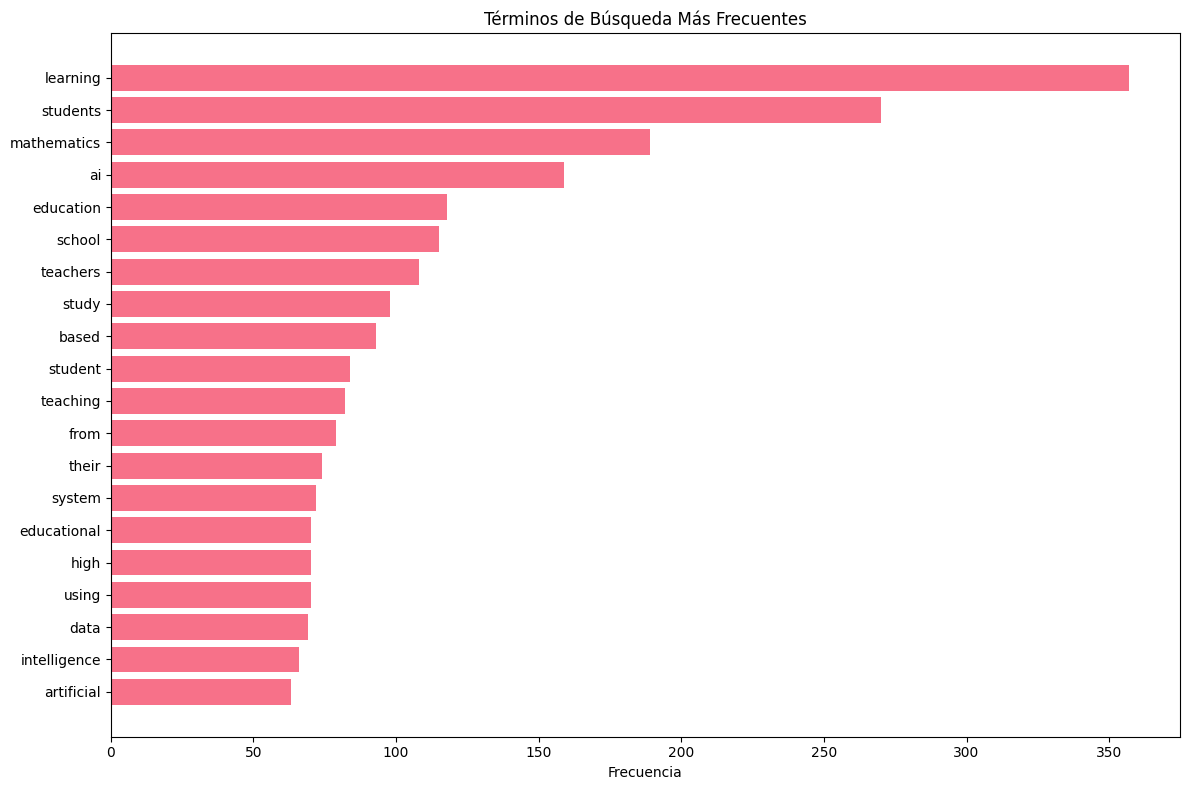

In [9]:
# Análisis de frecuencia de términos
all_terms = []
for terms in df['search_terms_title']:
    all_terms.extend(terms)
for terms in df['search_terms_abstract']:
    all_terms.extend(terms)

# Contar frecuencia
term_freq = Counter(all_terms)
most_common_terms = term_freq.most_common(20)

# Visualizar términos más frecuentes
terms, counts = zip(*most_common_terms)

plt.figure(figsize=(12, 8))
plt.barh(range(len(terms)), counts)
plt.yticks(range(len(terms)), terms)
plt.xlabel('Frecuencia')
plt.title('Términos de Búsqueda Más Frecuentes')
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

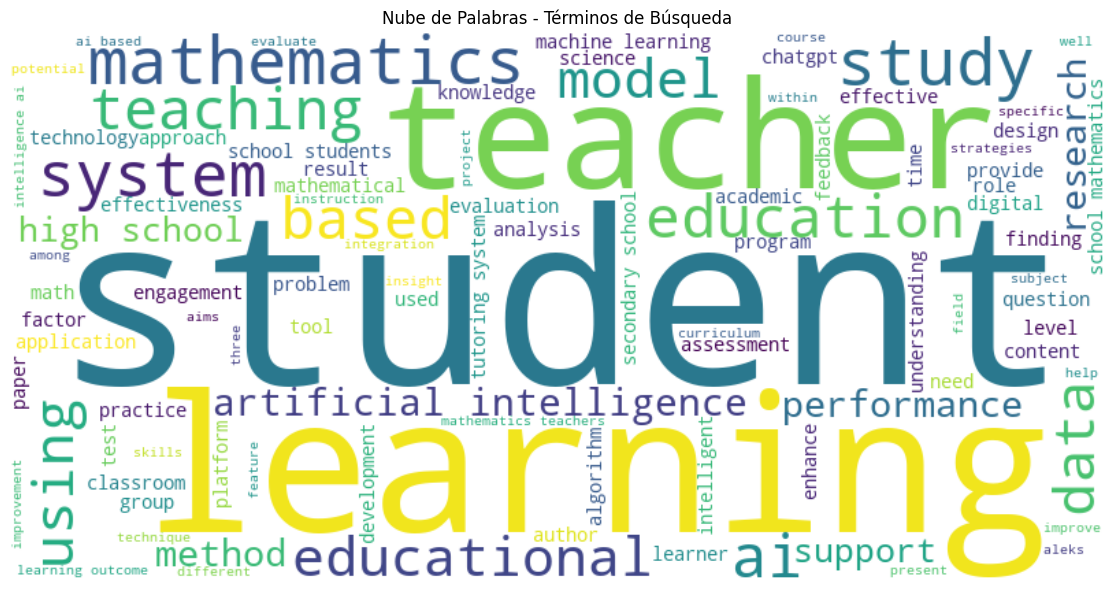

In [10]:
# Generar WordCloud
text = ' '.join(all_terms)

wordcloud = WordCloud(width=800, height=400, background_color='white', max_words=100).generate(text)

plt.figure(figsize=(12, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Nube de Palabras - Términos de Búsqueda')
plt.tight_layout()
plt.show()